In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk4(f, r0, h, tend): # runge-kutta method : 함수, 초기 값, # of steps, 종료 시간을 입력 받음.
    pt, pr= [], [] # 시간과 값을 저장하는 리스트
    t, r=0, np.array(r0,dtype=float)
    
    while t<= tend:
        pt.append(t)
        pr.append(r.copy())
        
        k1=f(t,r)
        k2=f(t+h/2,r+h/2*k1)
        k3=f(t+h/2,r+h/2*k2)
        k4=f(t+h,r+h*k3)
        r+=(h/6)*(k1+2*k2+2*k3+k4)
        t+=h
    return np.array(pt), np.array(pr)

def fdrag(t,r): # 운동방정식
    px, py, vx , vy=r # 위치 벡터와 속도 벡터를 변수로 함.
    coe=0.00347 # coefficient : 저항력 앞의 상수를 계산한 값.
    
    dx=vx
    dy=vy
    ddx=-coe*vx*np.sqrt(vx**2+vy**2)
    ddy=-9.8-coe*vy*np.sqrt(vx**2+vy**2)
    
    # 중력 방향을 - , 중력 반대 방향을 + 로 설정하였음.
    
    return np.array([dx, dy, ddx, ddy])

Text(0.5, 1.0, 'Trace of projectile')

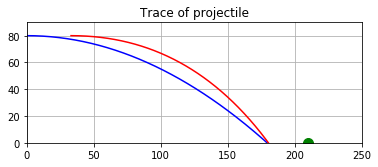

In [3]:
fig1, ax1=plt.subplots()

x=np.arange(0,250)
plt.plot(x,80-4.9*x**2*0.00050726,'b') # 이 그래프는 공기 저항이 없는 상황에 대한 궤적.

r0=[33,80,44.4,0]
tout,rout=rk4(fdrag,r0,0.01,5) # rk4 에서 반환되는 값을 각각 시간, 결과로 저장함.


ax1.plot(rout[:,0],rout[:,1],'r') # 결과의 첫 번째 원소 = x 위치, 두 번째 원소 = y 위치 로 그래프를 그림.

plt.plot(210,0,'go',ms=10) # cattle 의 위치를 x=210m 로 설정함. 다른 좌표들 모두 이를 기준으로 함.
ax1.grid()
ax1.set_aspect(1)
plt.xlim(0,250)
plt.ylim(0,90)
ax1.set_title('Trace of projectile')

Text(0.5, 1.0, 'Trace of projectile')

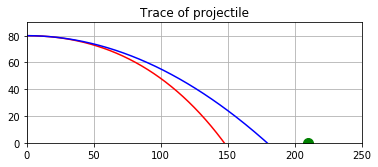

In [4]:
x=np.arange(0,250)
r0=[0,80,44.4,0]
tout,rout=rk4(fdrag,r0,0.01,5)


fig1, ax1=plt.subplots()
ax1.plot(rout[:,0],rout[:,1],'r')
plt.plot(x,80-4.9*x**2*0.00050726,'b')
plt.plot(210,0,'go',ms=10)
ax1.grid()
ax1.set_aspect(1)
plt.xlim(0,250)
plt.ylim(0,90)
ax1.set_title('Trace of projectile')